In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [16]:
# Carregar o dataset de Diabetes
diabetes = pd.read_csv("https://github.com/EdgarNoda/INTI6-2024/raw/refs/heads/main/datasets/Diabetes/diabetes.csv")

In [17]:
# Visualizar as primeiras linhas do dataset
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [18]:
# Verificar informações básicas do dataset
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [19]:
# Obter estatísticas descritivas
print(diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [20]:
# Verificar a distribuição da variável alvo 'Outcome'
print(diabetes['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


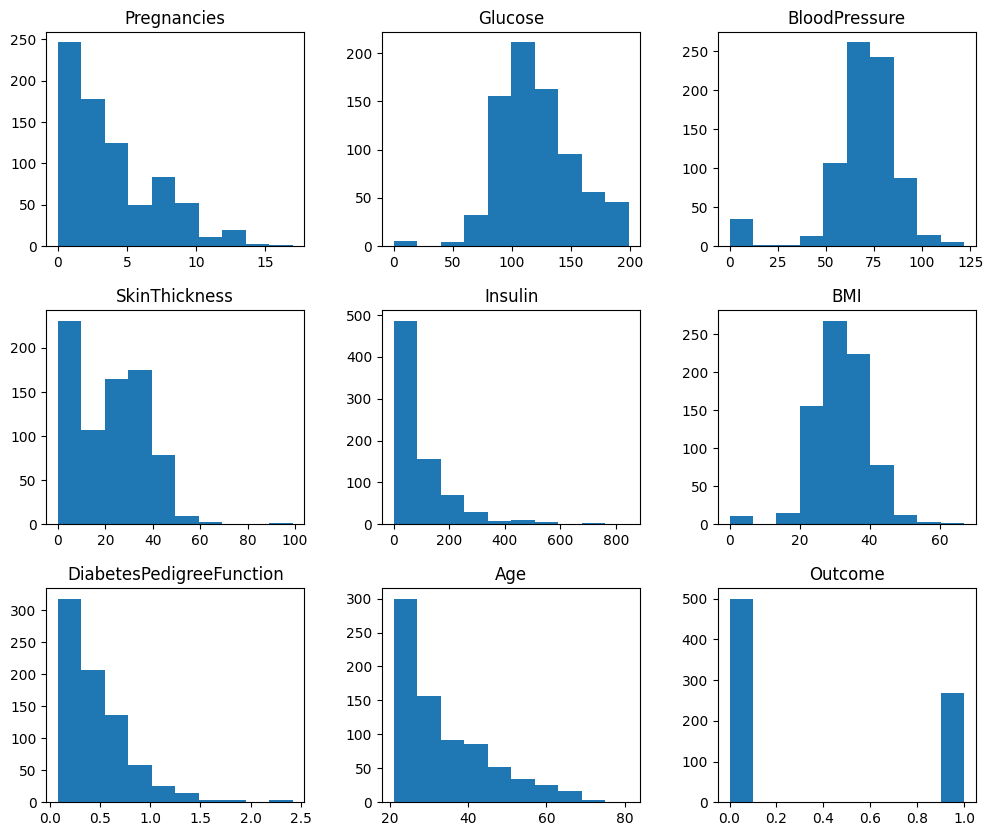

In [21]:
# Criar histogramas para as features numéricas
diabetes.hist(figsize=(12, 10), grid=False)
plt.show()

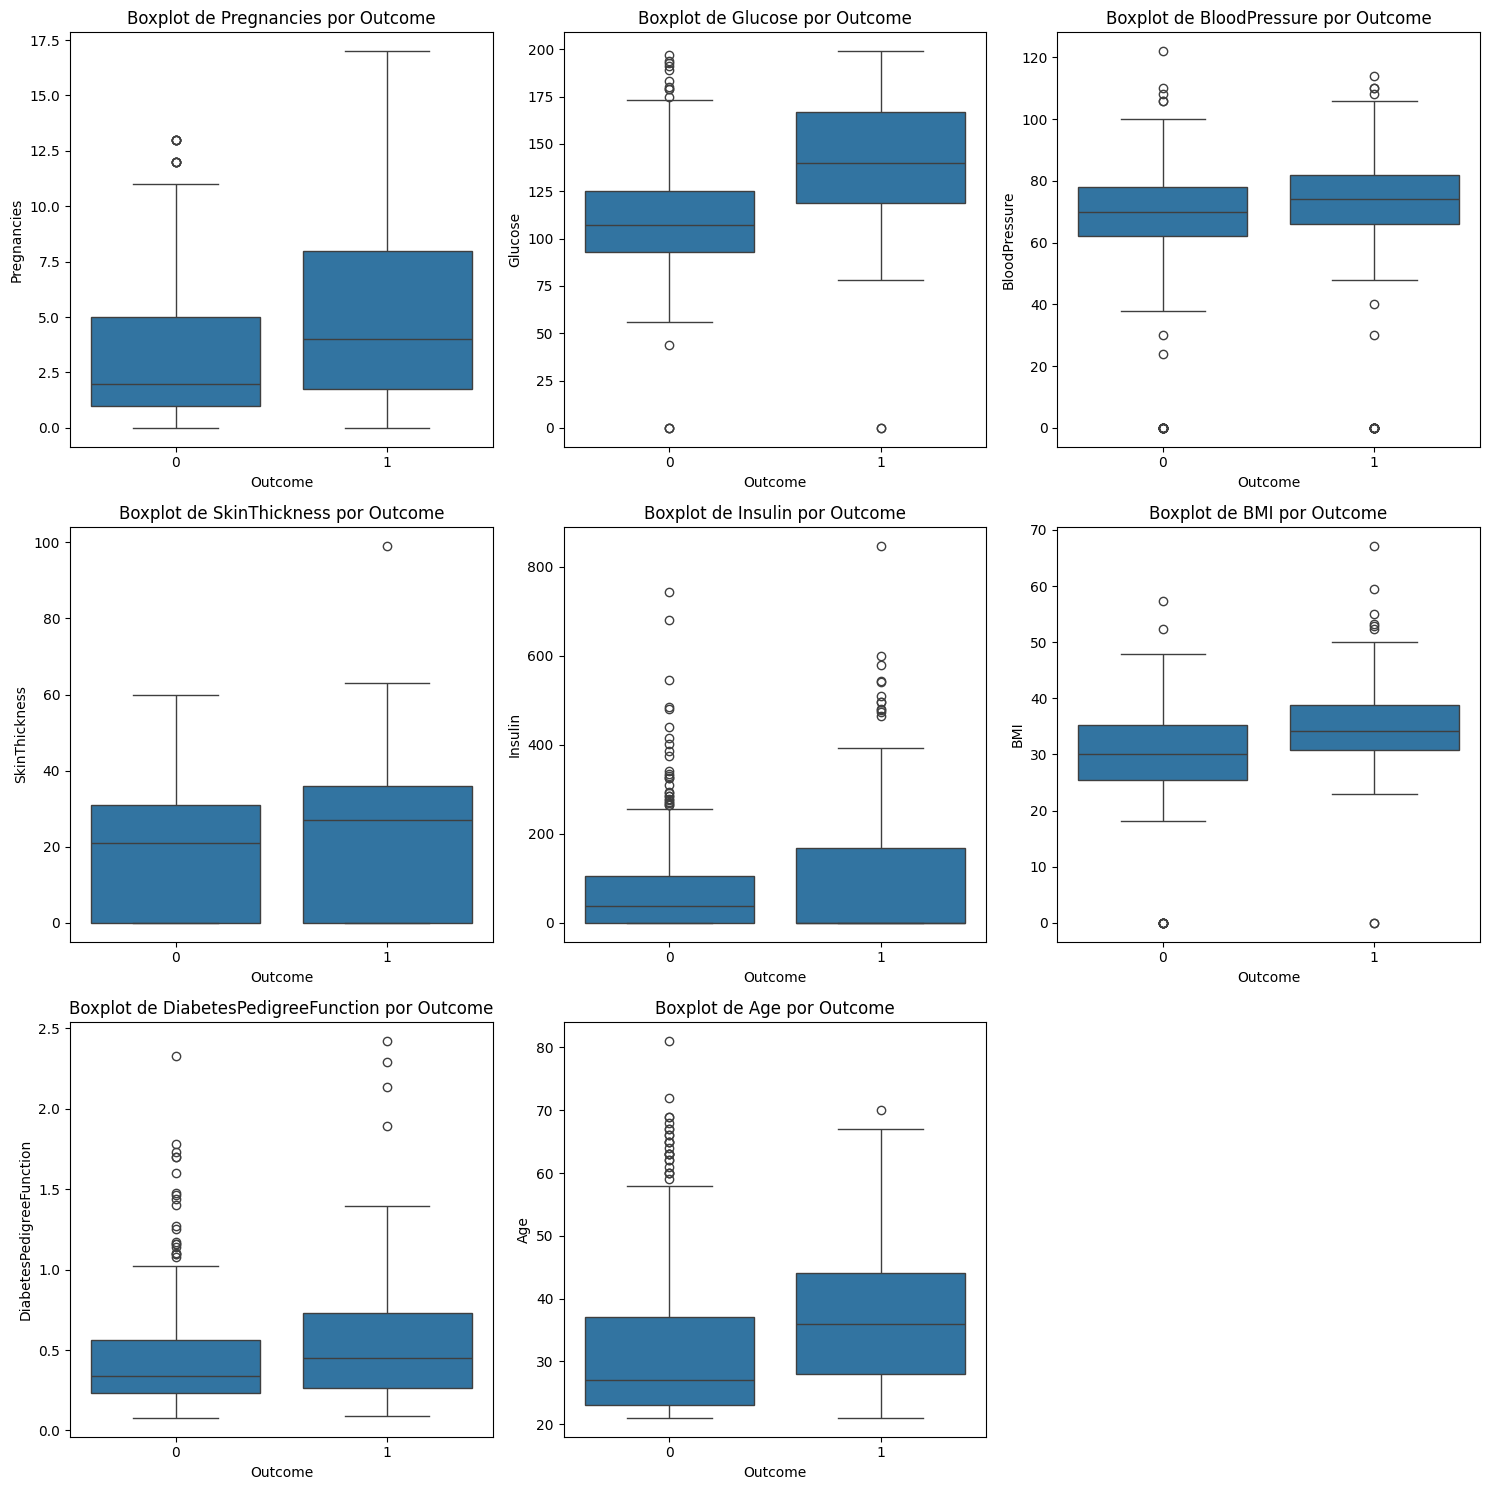

In [22]:
# Definir o número de linhas e colunas da grade de subplots
num_cols = 3  # Número de colunas
num_rows = int(len(diabetes.columns[:-1]) / num_cols) + (len(diabetes.columns[:-1]) % num_cols > 0)  # Número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Iterar sobre as colunas e criar os boxplots
col_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_idx < len(diabetes.columns[:-1]):
            sns.boxplot(x='Outcome', y=diabetes.columns[:-1][col_idx], data=diabetes, ax=axes[row, col])
            axes[row, col].set_title(f'Boxplot de {diabetes.columns[:-1][col_idx]} por Outcome')
            col_idx += 1
        else:
            axes[row, col].axis('off')  # Ocultar subplots vazios

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

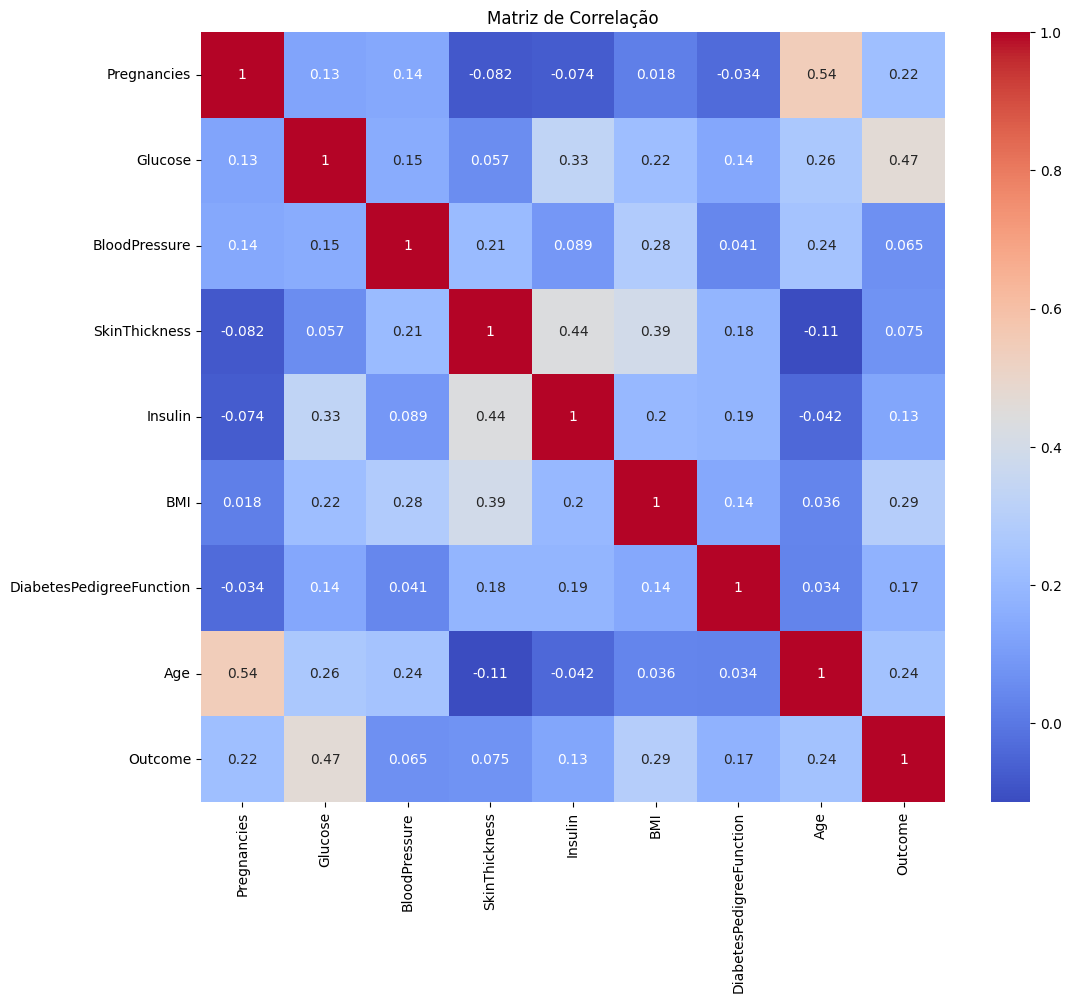

In [23]:
# Criar uma matriz de correlação
correlation_matrix = diabetes.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [25]:
# Separar as features e a variável alvo
X_diabetes = diabetes.drop(columns=['Outcome'])
y_diabetes = diabetes['Outcome']

# Dividir os dados em treino e teste
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

# Escalonamento das features
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# Otimização de Hiperparâmetros com GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_diabetes = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_diabetes, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_diabetes, y_train_diabetes)
best_rf_diabetes = grid_search.best_estimator_

# Fazer previsões e avaliar o modelo
y_pred_diabetes = best_rf_diabetes.predict(X_test_diabetes)
print("Acurácia (Diabetes):", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Matriz de Confusão (Diabetes):\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))
print("Relatório de Classificação (Diabetes):\n", classification_report(y_test_diabetes, y_pred_diabetes))

print("Melhores Hiperparâmetros:", grid_search.best_params_)

Acurácia (Diabetes): 0.7575757575757576
Matriz de Confusão (Diabetes):
 [[123  28]
 [ 28  52]]
Relatório de Classificação (Diabetes):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
